#### Importing the Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Reading the Dataframe

In [3]:
df = pd.read_csv(r"D:\demo_data\4.linearsep.csv", header=None)
df

,0,1,2
0,-0.177497,0.930496,1.0
1,1.977424,1.766155,0.0
2,1.800024,1.700343,0.0
3,-0.770837,2.359163,1.0
4,-0.308009,1.594063,1.0
...,...,...,...
95,2.632382,1.271305,0.0
96,-0.040256,1.782708,1.0
97,-0.787453,1.400357,1.0
98,2.702441,1.587444,0.0


In [4]:
df[[0,1]]

,0,1
0,-0.177497,0.930496
1,1.977424,1.766155
2,1.800024,1.700343
3,-0.770837,2.359163
4,-0.308009,1.594063
...,...,...
95,2.632382,1.271305
96,-0.040256,1.782708
97,-0.787453,1.400357
98,2.702441,1.587444


<AxesSubplot:xlabel='0', ylabel='1'>

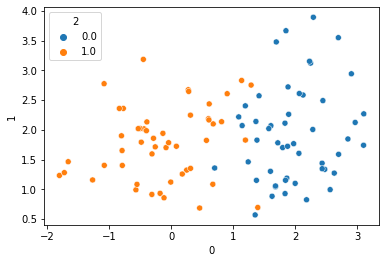

In [5]:
sns.scatterplot(x=df[0],y=df[1],hue=df[2],data=df)

#### splitting the data into train and test and strandarization of it

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df[[0,1]],df[2],test_size=0.1)

In [7]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [8]:
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

#### Building MLP

In [9]:
# Implement Neural Networks for classification task and decision boundary
import tensorflow
import tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [10]:
model = Sequential()
model.add(Dense(12,activation='relu', input_dim = 2))
model.add(Dense(10,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

#### Training the Model

In [14]:
save = model.fit(x_train, y_train, epochs = 80, validation_split= 0.2)

Epoch 1/80
3/3 [==============================] - 2s 113ms/step - loss: 0.6932 - accuracy: 0.4722 - val_loss: 0.6927 - val_accuracy: 0.6111
Epoch 2/80
3/3 [==============================] - 0s 18ms/step - loss: 0.6929 - accuracy: 0.5833 - val_loss: 0.6925 - val_accuracy: 0.7222
Epoch 3/80
3/3 [==============================] - 0s 21ms/step - loss: 0.6927 - accuracy: 0.6528 - val_loss: 0.6925 - val_accuracy: 0.7778
Epoch 4/80
3/3 [==============================] - 0s 17ms/step - loss: 0.6925 - accuracy: 0.7639 - val_loss: 0.6926 - val_accuracy: 0.6667
Epoch 5/80
3/3 [==============================] - 0s 19ms/step - loss: 0.6923 - accuracy: 0.7778 - val_loss: 0.6925 - val_accuracy: 0.6667
Epoch 6/80
3/3 [==============================] - 0s 16ms/step - loss: 0.6919 - accuracy: 0.7639 - val_loss: 0.6921 - val_accuracy: 0.6667
Epoch 7/80
3/3 [==============================] - 0s 16ms/step - loss: 0.6915 - accuracy: 0.8472 - val_loss: 0.6916 - val_accuracy: 0.7778
Epoch 8/80
3/3 [==========

In [16]:
save.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

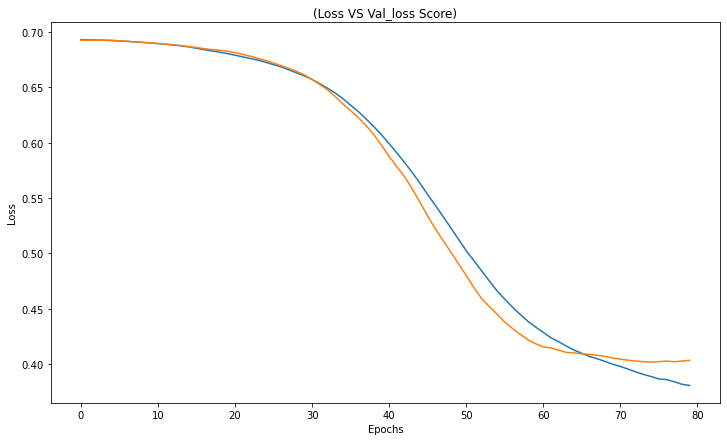

In [15]:
# history.history['loss'], history.history['val_loss'] 
plt.figure(figsize=(12, 7))
plt.plot(save.history['loss'])
plt.plot(save.history['val_loss'])
plt.title("(Loss VS Val_loss Score)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [17]:
y_pred=model.predict(x_test)

1/1 [==============================] - 0s 111ms/step


In [18]:
y_capf=np.where(y_pred>0.5,1,0)


In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

1.0

3888/3888 [==============================] - 5s 1ms/step


<AxesSubplot:>

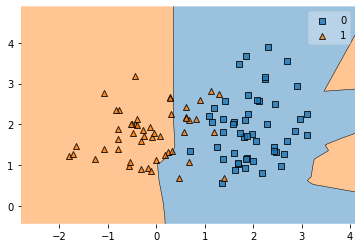

In [21]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(df[[0,1]].values,df[2].values.astype(int),clf=model)

3888/3888 [==============================] - 4s 1ms/step


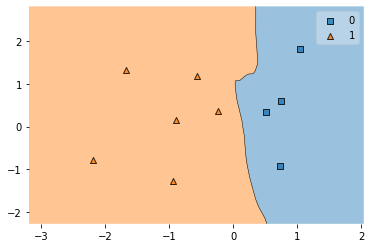

In [22]:
plot_decision_regions(x_test, y_test.values.astype(int), clf = model);